In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [2]:
df = pd.read_csv("coin_gecko_2022-03-16.csv")
df2 = pd.read_csv("coin_gecko_2022-03-17.csv")

In [3]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
# missing values
df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

There are missing values on three columns. Let's check if the missing values is in the same coins

In [5]:
df[df["1h"].isnull()==True].index, df[df["24h"].isnull()==True].index, df[df["7d"].isnull()==True].index, df[df["24h_volume"].isnull()==True].index 

(Index([310, 416, 472], dtype='int64'),
 Index([310, 416, 472], dtype='int64'),
 Index([310, 416, 472], dtype='int64'),
 Index([310, 416, 472], dtype='int64'))

In [6]:
# removing the row with missing value 
df = df.drop([310, 416, 472])

In [8]:
# add price and price changes in 1h, 24h, 7d to know the movement of the price 
df["price_7d"] = df["price"] + df["7d"]
df["price_24h"] = df["price"] + df["24h"]
df["price_1h"] = df["price"] + df["1h"]

In [9]:
# checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        497 non-null    object 
 1   symbol      497 non-null    object 
 2   price       497 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     497 non-null    float64
 8   date        497 non-null    object 
 9   price_7d    497 non-null    float64
 10  price_24h   497 non-null    float64
 11  price_1h    497 non-null    float64
dtypes: float64(9), object(3)
memory usage: 50.5+ KB


EDA
In this section, EDA will be done to find some insights. Because the data is consists of more than 1 cryptocurrency, the EDA will be for each cryptocurrency

In [10]:
df["coin"].unique(), df["symbol"].unique()

(array(['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin', 'XRP', 'Terra',
        'Solana', 'Cardano', 'Polkadot', 'Avalanche', 'Binance USD',
        'Dogecoin', 'TerraUSD', 'Shiba Inu', 'Wrapped Bitcoin', 'Cronos',
        'Polygon', 'Dai', 'Cosmos Hub', 'Litecoin', 'Lido Staked Ether',
        'Near', 'Chainlink', 'TRON', 'FTX Token', 'Bitcoin Cash',
        'LEO Token', 'OKB', 'Algorand', 'Stellar', 'Uniswap', 'Hedera',
        'Axie Infinity', 'Decentraland', 'Ethereum Classic', 'Elrond',
        'The Sandbox', 'Internet Computer', 'Monero', 'cETH', 'VeChain',
        'Fantom', 'Filecoin', 'Osmosis', 'Klaytn', 'Frax', 'Waves',
        'Theta Network', 'Magic Internet Money', 'The Graph', 'Tezos',
        'cUSDC', 'Helium', 'THORChain', 'EOS', 'ECOMI', 'IOTA', 'cDAI',
        'Flow', 'Theta Fuel', 'Aave', 'Zcash', 'Maker', 'JUNO', 'Gala',
        'BitTorrent', 'Arweave', 'Huobi BTC', 'PancakeSwap', 'Quant',
        'Harmony', 'eCash', 'Bitcoin SV', 'NEO', 'TrueUSD', 'Huobi Token'

There are so many cryptocurrency

In [11]:
# check the number of crypto in dataset
df["coin"].nunique(), df["symbol"].nunique()

(497, 494)

There are 497 coins and 494 symbols in the dataset. This means only there single row for every coin

Graph the price movement

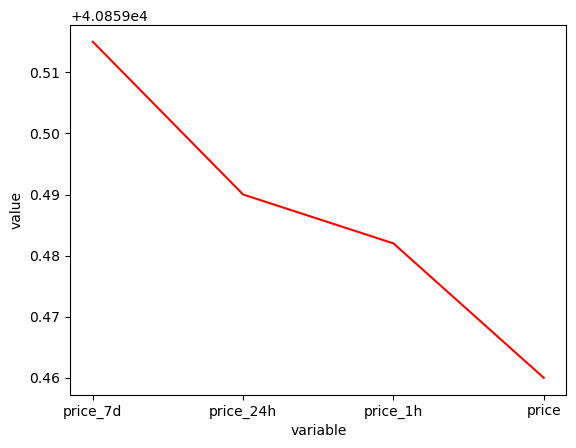

In [12]:
# function for plotting coin price movement  
def price_movement(coin_symbol): 
    selected_coin = df[df.symbol == coin_symbol][["price_7d", "price_24h", "price_1h", "price"]]
    # line plot for movement 
    sns.lineplot(data=pd.melt(selected_coin), x="variable", y="value", color="red")
    plt.show()
# btc movement 
price_movement("BTC")

The price for BTC in the last 7 days is decreasing about 0.46

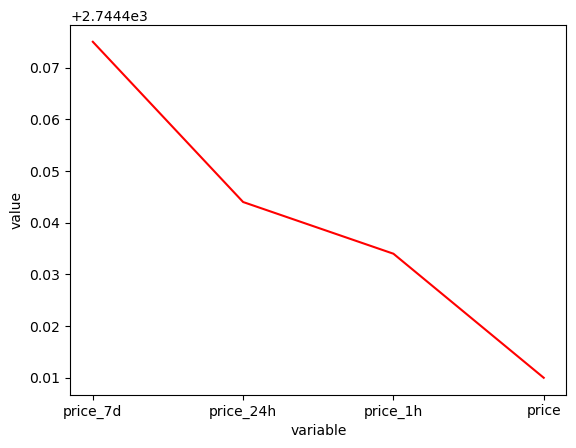

In [13]:
# eth movement
price_movement("ETH")

The price for ETH in the last 7 days is decreasing about 0.01

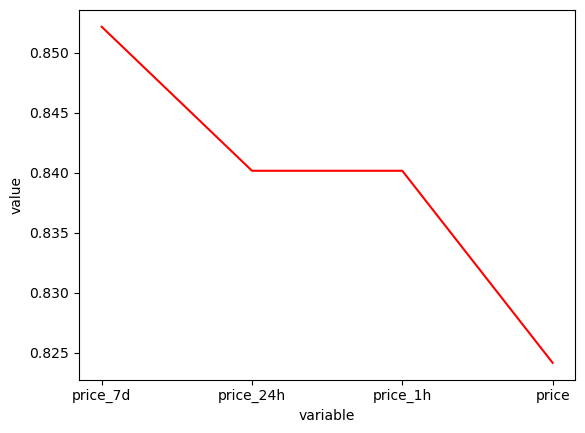

In [14]:
price_movement("ADA")

The price for ADA in the last 7 days is decreasing about 0.825

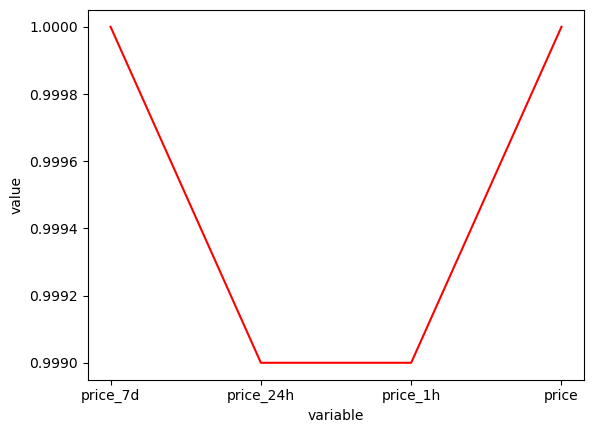

In [15]:
price_movement("USDT")

The price for USDT in the last 7 days is volatile. From last 7 days to last 24h the price was decreasing. From last 24h to last 1h the price was stable. From last 1h to now the price was increasing

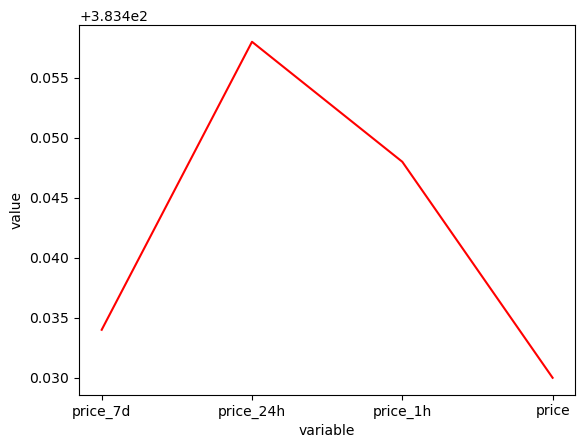

In [16]:
price_movement("BNB")

The price for BTC in the last 7 days was increasing and decreasing

In [17]:
# Coins with top market cap
df.sort_values(by="mkt_cap", ascending=False).head(10)[["coin", "symbol", "mkt_cap"]]

,coin,symbol,mkt_cap
0,Bitcoin,BTC,7.709915e+11
1,Ethereum,ETH,3.271044e+11
2,Tether,USDT,7.996516e+10
3,BNB,BNB,6.404382e+10
4,USD Coin,USDC,5.222214e+10
5,XRP,XRP,3.753079e+10
6,Terra,LUNA,3.294596e+10
7,Solana,SOL,2.753589e+10
8,Cardano,ADA,2.633189e+10
9,Polkadot,DOT,2.017527e+10


In [18]:
# Most traded coins in last 24 hours
df.sort_values(by="24h_volume", ascending=False).head(10)[["coin", "symbol", "24h_volume"]]

,coin,symbol,24h_volume
2,Tether,USDT,5.793497e+10
0,Bitcoin,BTC,3.539076e+10
1,Ethereum,ETH,1.974870e+10
11,Binance USD,BUSD,4.039490e+09
5,XRP,XRP,3.925205e+09
4,USD Coin,USDC,3.872274e+09
6,Terra,LUNA,2.661508e+09
7,Solana,SOL,1.776167e+09
47,Waves,WAVES,1.508088e+09
3,BNB,BNB,1.395854e+09


Most of the coins which traded in last 24h are coins which have biggest market capitalization. The coins are USDT (Tether), BTC (Bitcoin), ETH (Ethereum), etc.

Analysis

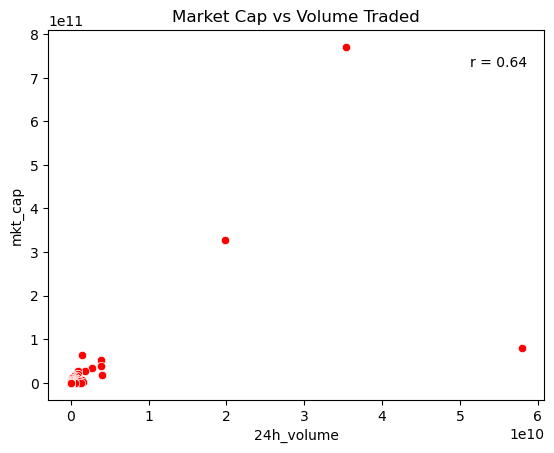

In [19]:
# Correlation between market cap and traded volume
sns.scatterplot(data=df, x="24h_volume", y="mkt_cap", color="red").set(title="Market Cap vs Volume Traded")
mctv_r, mctv_p = pearsonr(df["24h_volume"], df["mkt_cap"])
plt.annotate('r = {:.2f}'.format(mctv_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()


From the scatterplot, there is linear relationship between market cap and traded volume. The pearson r correlation is 0.64 and this means the correlation between market cap and traded volume in the last 24 hours is strong

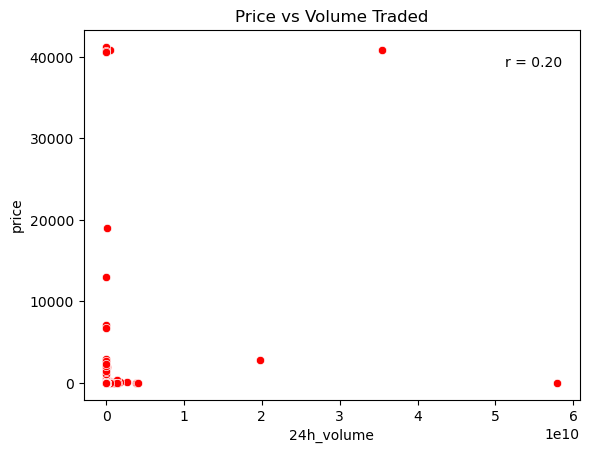

In [20]:
# Correlation between price and traded volume
sns.scatterplot(data=df, x="24h_volume", y="price", color="red").set(title="Price vs Volume Traded")  
prtv_r, prtv_p = pearsonr(df["price"], df["24h_volume"])
plt.annotate('r = {:.2f}'.format(prtv_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

From the scatterplot, there is linear relationship between price and traded volume in the last 24 hours. The pearson r correlation is 0.2 and this means the correlation between price and traded volume in the last 24 hours is weak

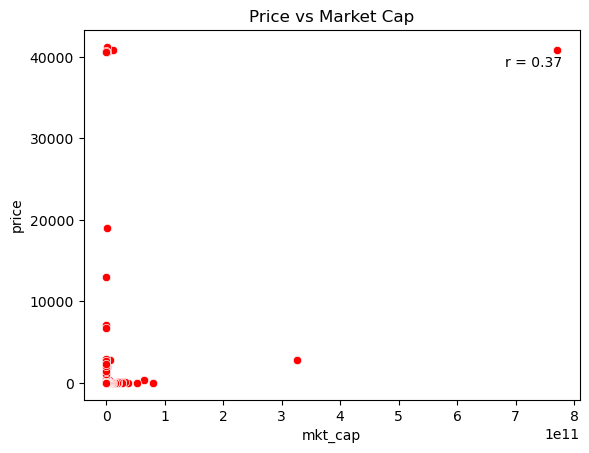

In [21]:
# Correlation between price and market cap
sns.scatterplot(data=df, x="mkt_cap", y="price", color="red").set(title="Price vs Market Cap")
mcpr_r, mcpr_p = pearsonr(df["price"], df["mkt_cap"])
plt.annotate('r = {:.2f}'.format(mcpr_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

From the scatterplot, there is linear relationship between price and market cap. The pearson r correlation is 0.37 and this means the correlation between price and market cap is weak

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


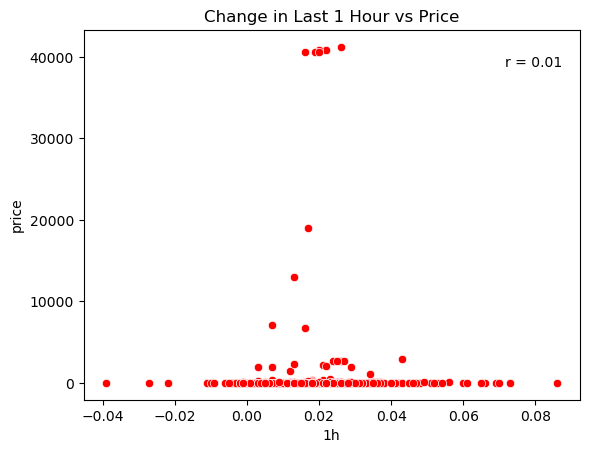

In [22]:
# Correlation between price and 1h change
sns.scatterplot(data=df, x="1h", y="price", color="red").set(title="Change in Last 1 Hour vs Price")
ohpr_r, ohpr_p = pearsonr(df["price"], df["1h"])
plt.annotate('r = {:.2f}'.format(ohpr_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

From the scatterplot, there is linear relationship between price and 1 hour change. The pearson r correlation is 0.01 and this means the correlation between price and 1 hour change is very weak

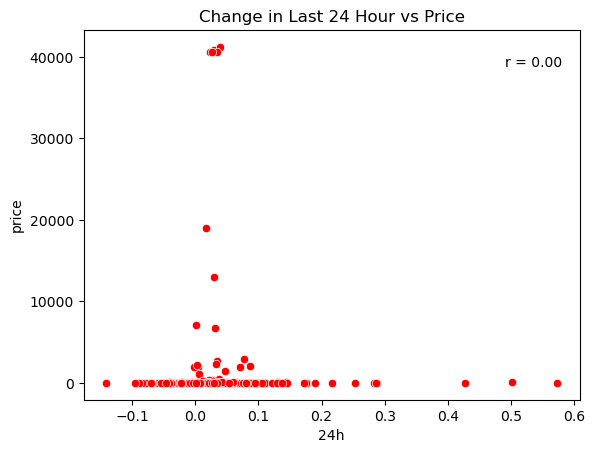

In [23]:
# Correlation between price and 24h change
sns.scatterplot(data=df, x="24h", y="price", color="red").set(title="Change in Last 24 Hour vs Price")
tfpr_r, tfpr_p = pearsonr(df["price"], df["24h"])
plt.annotate('r = {:.2f}'.format(tfpr_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

From the scatterplot, there is linear relationship between price and 24 hour change. The pearson r correlation is 0.00. Even thought the value is 0.00, there are some points which show that the relationship is exist. The value become zero could be caused by formatting only two values after coma. In this case the relationship between price and 24 hour change is very weak (almost 0)

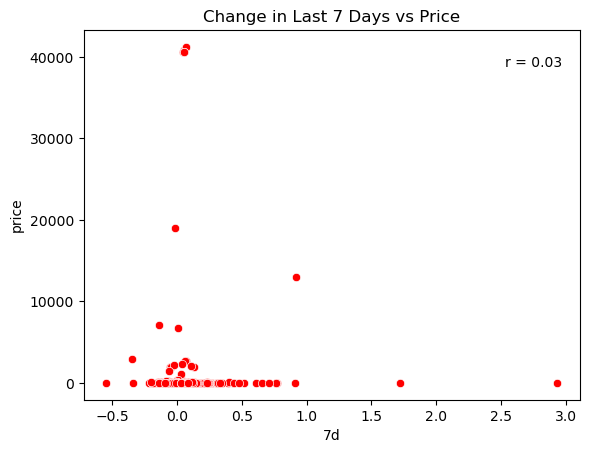

In [24]:
# Correlation between price and 24h change
sns.scatterplot(data=df, x="7d", y="price", color="red").set(title="Change in Last 7 Days vs Price")
sdpr_r, sdpr_p = pearsonr(df["price"], df["7d"])
plt.annotate('r = {:.2f}'.format(sdpr_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

From the scatterplot, there is linear relationship between price and 7 day change. The pearson r correlation is 0.03 and this means the correlation between price and 7 day change is very weak

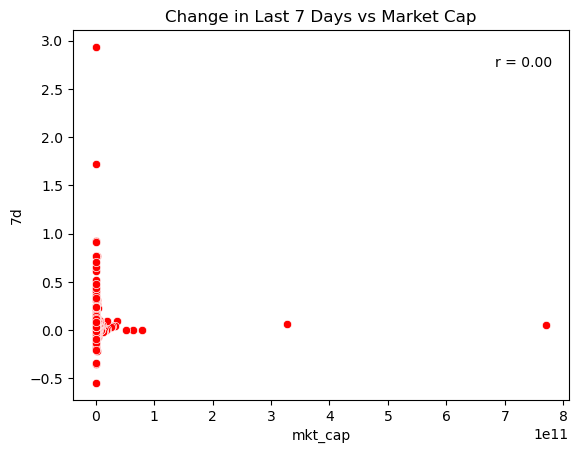

In [26]:
# Correlation between price price change in 7d and market cap
sns.scatterplot(data=df, x="mkt_cap", y="7d", color="red").set(title="Change in Last 7 Days vs Market Cap")
sdmc_r, sdmc_p = pearsonr(df["mkt_cap"], df["7d"])
plt.annotate('r = {:.2f}'.format(sdmc_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

The change from seven days before has no linear correlation with market cap. The pearson r correlation is 0.00 and this means the correlation between market cap and changes in last 7 days is none

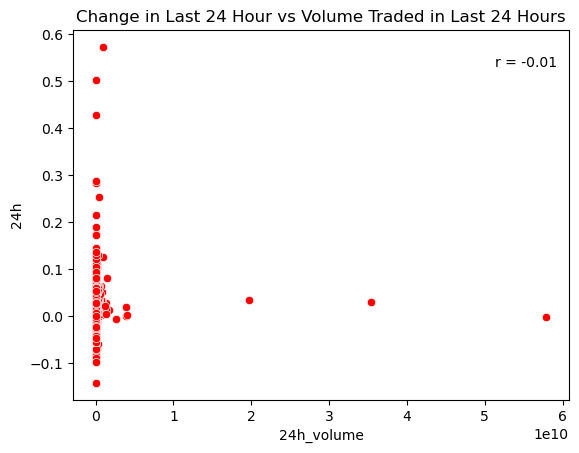

In [27]:
# Correlation between price change in 24h and volume traded
sns.scatterplot(data=df, x="24h_volume", y="24h", color="red").set(title="Change in Last 24 Hour vs Volume Traded in Last 24 Hours")
tftv_r, tftv_p = pearsonr(df["24h"], df["24h_volume"])
plt.annotate('r = {:.2f}'.format(tftv_r), xy=(0.85, 0.9), xycoords='axes fraction')
plt.show()

The change from seven days before has no linear correlation with market cap


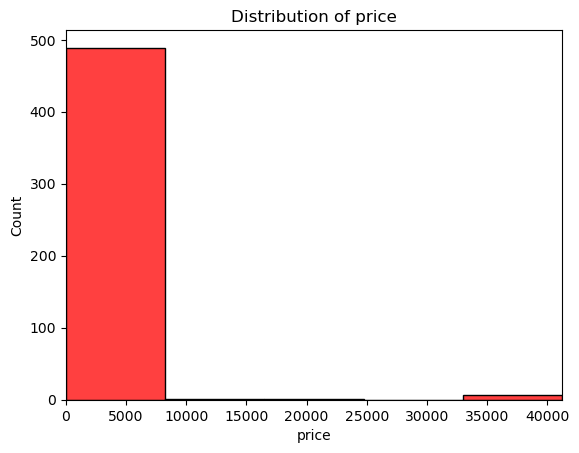

In [28]:
# Distribution of price
sns.histplot(x="price", data=df, color="red", bins=5).set(title="Distribution of price", xlim=[0, max(df["price"])])
plt.show()


The price is vary from under 1 to 40k USD

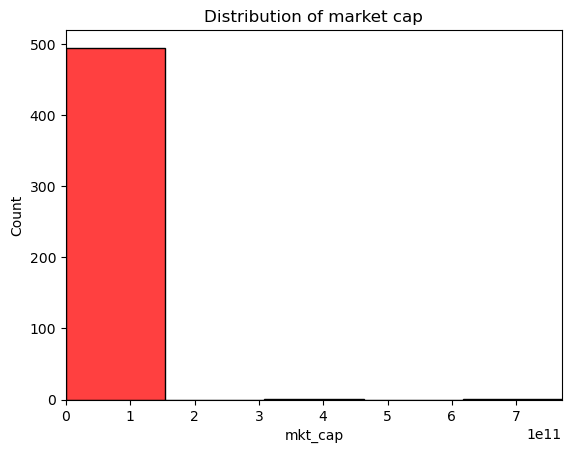

In [29]:
# Distribution market cap
sns.histplot(x="mkt_cap", data=df, color="red", bins=5).set(title="Distribution of market cap", xlim=[0, max(df["mkt_cap"])])
plt.show()

The market cap is vary from under 1 to 7e11

Modelling
In this section, modelling for predicting the coin price will be done. The features that will be used are market cap, traded volume, and price change (1h, 24h, 7d). XGBoost will be used to predict the price. XGBoost used because XGBoost is one of many model that is good enought in many cases and I'm learnig XGBoost more and more

The data from March  
17
t
h
  will be used as test set
Check the test set first

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


Some values are missing. The row will be removed. For data types, all variable is in right data types

In [31]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        495 non-null    object 
 1   symbol      495 non-null    object 
 2   price       495 non-null    float64
 3   1h          495 non-null    float64
 4   24h         495 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  495 non-null    float64
 7   mkt_cap     495 non-null    float64
 8   date        495 non-null    object 
dtypes: float64(6), object(3)
memory usage: 38.7+ KB


In [32]:
# define the x and y variable 
X_train, y_train = df[["1h", "24h", "7d", "mkt_cap", "24h_volume"]], df["price"] 
X_test, y_test = df2[["1h", "24h", "7d", "mkt_cap", "24h_volume"]], df2["price"]  

# make the X and y into DMatrix for XGBoost 
dtrain = xgb.DMatrix(X_train, y_train)

dtest = xgb.DMatrix(X_test, y_test)